# Основные понятия машинного обучения

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
* https://contrib.scikit-learn.org/category_encoders/
* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* http://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


## Задачи для совместного разбора

1\. Загрузите набор данных из файла `possum.csv` в виде `pd.DataFrame`. Решите задачу классификации по столбцу `sex`.

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('possum.csv').drop('case',axis=1).fillna(0)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df.isna().sum().sum()

0

In [ ]:
# df['Pop'] = (df['Pop'] == 'Vic').astype(int)
df['sex'] = (df['sex'] == 'm').astype(int)
# df.head()

In [ ]:
X = df.drop('sex',axis=1)
y = df['sex']
X.head()

,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
    )

In [ ]:
X_test.head()

,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
30,1,Vic,3.0,92.8,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0
65,5,other,3.0,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0
64,5,other,5.0,93.5,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5
53,4,other,7.0,96.9,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5
45,2,Vic,0.0,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


## **Рекомендация**
Category_encoders package

In [ ]:
tr = ColumnTransformer(
    [
        ('any_name', ce.OrdinalEncoder(), ['Pop']),
        ('any_name2', OneHotEncoder(), ['site'])
    ],
    remainder=MinMaxScaler()
).fit(X_train)

In [ ]:
X_train_t = tr.transform(X_train)
X_test_t = tr.transform(X_test)

In [ ]:
model = RandomForestClassifier(random_state=42).fit(X_train_t, y_train)

In [ ]:
model.score(X_train_t, y_train)

1.0

In [ ]:
model.score(X_test_t, y_test)

0.7142857142857143

2\. Проверьте качество обучения модели с использованием перекрестной проверки

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(
    RandomForestClassifier(random_state=42),
    X_train_t,
    y_train,
    cv=5
)

array([0.76470588, 0.41176471, 0.52941176, 0.5       , 0.625     ])

3\. Найдите оптимальные гиперпараметры модели, используя поиск по сетке.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
        'n_estimators': [50,100,150,200],
        'max_depth': [None,1,2,3]
    }
).fit(X_train_t, y_train)

In [ ]:
grid.best_params_, grid.best_score_

({'max_depth': 3, 'n_estimators': 150}, 0.6014705882352941)

## Задачи для самостоятельного решения

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, Normalizer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

<p class="task" id="1"></p>

1\. Загрузите набор данных из файла `Walmart.csv` в виде `pd.DataFrame`. Преобразуйте столбец `Temperature` в числовой. Преобразуйте столбец `IsHoliday` в числовой столбец, содержащий значения 0 и 1, предварительно проанализировав значения в этом столбце.

In [3]:
df = pd.read_csv('Walmart.csv')
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31°C,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51°C,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,19-02-2010,1611968.17,39.93°C,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,26-02-2010,1409727.59,46.63°C,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,05-03-2010,1554806.68,46.5°C,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [4]:
df.isna().sum().sum()

0

### Temperature

In [5]:
(df['Temperature'].apply(lambda x: x[-2:] == '°C')).all()

True

In [6]:
df['Temperature'] = df['Temperature'].apply(lambda x: np.float64(x[:-2]))
df['Temperature']

0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64

### IsHoliday

In [7]:
df['IsHoliday'].unique()

array(['0', 'Y', 'N', 'n', '-', 'no', 'No', 'y', 'Yes', '1', 'yes'],
      dtype=object)

In [8]:
# проверка, что значит '-' (NaN или отсутствие праздника)
holidays = set(['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013', '10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013', '26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013', '31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013'])
(df[df['IsHoliday'] == '-']['Date']
    .apply(lambda x: x in holidays)).any()

False

In [9]:
df['IsHoliday'] = df['IsHoliday'].apply(lambda x: 1 if x=='1' or x[0].lower()=='y' else 0)
df['IsHoliday']

0       0
1       1
2       0
3       0
4       0
       ..
6430    0
6431    0
6432    0
6433    0
6434    0
Name: IsHoliday, Length: 6435, dtype: int64

<p class="task" id="2"></p>

2\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 для решения задачи регрессии. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [10]:
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,1
2,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,0
3,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,0
4,05-03-2010,1554806.68,46.50,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [101]:
X_train, X_test = train_test_split(
    df,
    train_size=0.7,
    random_state=42
    )
X_train.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
1288,12-02-2010,2176028.52,49.96,2.828,126.496258,9.765,d3d9446802a44259755d38e6d163e820,1
1115,13-04-2012,909989.45,65.19,3.891,225.062571,5.679,c9f0f895fb98ab9159f51fd0297e236d,0
582,16-04-2010,306858.69,65.30,2.808,211.038853,6.465,e4da3b7fbbce2345d7772b0674a318d5,0
3647,24-06-2011,997474.93,56.94,3.851,135.265267,7.818,4e732ced3463d06de0ca9a15b6153677,0
1564,31-08-2012,1372872.35,86.49,3.638,225.829306,6.334,6512bd43d9caa6e02c990b0a82652dca,0


In [102]:
X_train.dtypes

Date             object
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
StoreId          object
IsHoliday         int64
dtype: object

In [103]:
set(df.StoreId.unique()) == set(X_train.StoreId.unique())

True

In [104]:
X_train['Date'] = X_train['Date'].apply(lambda x: pd.to_datetime(x, format="%d-%m-%Y").toordinal())
X_test['Date'] = X_test['Date'].apply(lambda x: pd.to_datetime(x, format="%d-%m-%Y").toordinal())

tr1 = ColumnTransformer(
    [
        ('StoreId_OE', ce.OrdinalEncoder(), ['StoreId']),
        ('MinMax', MinMaxScaler(), ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Date'])
    ],
    remainder='passthrough'
).fit(X_train)

tr2 = ColumnTransformer(
    [
        ('StoreId_OHE', ce.OneHotEncoder(), ['StoreId']),
        ('Norm', Normalizer(norm='l1'), ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
    ],
    remainder='passthrough'
).fit(X_train.drop('Date', axis=1))

In [105]:
col_names1 = tr1.get_feature_names_out()
col_names2 = tr2.get_feature_names_out()
X_train_t1 = pd.DataFrame(tr1.transform(X_train), columns=col_names1)
X_test_t1 = pd.DataFrame(tr1.transform(X_test), columns=col_names1)

X_train_t2 = pd.DataFrame(tr2.transform(X_train.drop('Date', axis=1)), columns=col_names2)
X_test_t2 = pd.DataFrame(tr2.transform(X_test.drop('Date', axis=1)), columns=col_names2)

In [106]:
X_train_t1.head()

,StoreId_OE__StoreId,MinMax__Weekly_Sales,MinMax__Temperature,MinMax__Fuel_Price,MinMax__CPI,MinMax__Unemployment,MinMax__Date,remainder__IsHoliday
0,1.0,0.555525,0.509002,0.160696,0.004273,0.564117,0.007042,1.0
1,2.0,0.197793,0.658023,0.704708,0.978548,0.172513,0.802817,0.0
2,3.0,0.027372,0.659100,0.150461,0.839931,0.247844,0.070423,0.0
3,4.0,0.222513,0.577299,0.684237,0.090950,0.377516,0.507042,0.0
4,5.0,0.328585,0.866438,0.575230,0.986127,0.235288,0.943662,0.0


In [107]:
X_train_t2.head()

,StoreId_OHE__StoreId_1,StoreId_OHE__StoreId_2,StoreId_OHE__StoreId_3,StoreId_OHE__StoreId_4,StoreId_OHE__StoreId_5,StoreId_OHE__StoreId_6,StoreId_OHE__StoreId_7,StoreId_OHE__StoreId_8,StoreId_OHE__StoreId_9,StoreId_OHE__StoreId_10,...,StoreId_OHE__StoreId_42,StoreId_OHE__StoreId_43,StoreId_OHE__StoreId_44,StoreId_OHE__StoreId_45,Norm__Weekly_Sales,Norm__Temperature,Norm__Fuel_Price,Norm__CPI,Norm__Unemployment,remainder__IsHoliday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999913,0.000023,0.000001,0.000058,0.000004,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999671,0.000072,0.000004,0.000247,0.000006,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999070,0.000213,0.000009,0.000687,0.000021,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999796,0.000057,0.000004,0.000136,0.000008,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999765,0.000063,0.000003,0.000164,0.000005,0.0


<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Weekly_Sales` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных регрессионных метрик (MAE, MSE, RMSE, MAPE). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам). Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.   

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [17]:
y_train_t1 = X_train_t1['MinMax__Weekly_Sales']
X_train_t1 = X_train_t1.drop('MinMax__Weekly_Sales', axis=1)
y_train_t2 = X_train_t2['Norm__Weekly_Sales']
X_train_t2 = X_train_t2.drop('Norm__Weekly_Sales', axis=1)

y_test_t1 = X_test_t1['MinMax__Weekly_Sales']
X_test_t1 = X_test_t1.drop('MinMax__Weekly_Sales', axis=1)
y_test_t2 = X_test_t2['Norm__Weekly_Sales']
X_test_t2 = X_test_t2.drop('Norm__Weekly_Sales', axis=1)

In [28]:
def RMSE(y_true, y_pred):
  return mean_squared_error(y_true, y_pred, squared=False)

In [70]:
models = [LinearRegression(), DecisionTreeRegressor(), SVR()]
metrics = {'MAE': mean_absolute_error, 'MSE': mean_squared_error, 'RMSE': RMSE, 'MAPE': mean_absolute_percentage_error}
Xy_sets = {'transform1': (X_train_t1, X_test_t1, y_train_t1, y_test_t1), 'transform2': (X_train_t2, X_test_t2, y_train_t2, y_test_t2)}

mod_names = []
idx = []
res = []

for model in models:
  mod_names.append(type(model).__name__)
  idx.append([])
  for metric in metrics:
    for tr in Xy_sets:
      idx[-1].append((metric, tr, 'train'))
      idx[-1].append((metric, tr, 'test'))

      X_train_, X_test_, y_train_, y_test_ = Xy_sets[tr]
      model.fit(X_train_,y_train_)

      y_pred_train_ = model.predict(X_train_)
      y_pred_test_ = model.predict(X_test_)
      res.append(metrics[metric](y_train_, y_pred_train_))
      res.append(metrics[metric](y_test_, y_pred_test_))

index = pd.MultiIndex.from_tuples(idx[0], names=["", "", ""])
pd.DataFrame(np.array(res).reshape(-1,3), index=index, columns=mod_names).T

MAE                                            \
                         transform1                  transform2                 
                              train          test         train          test   
LinearRegression       1.308265e-01  4.813531e-09  1.195963e-14  1.576777e-01   
DecisionTreeRegressor  1.327093e-01  2.447568e-02  9.714122e-17  1.093601e-07   
SVR                    6.861606e-09  2.486225e-02  1.564470e-01  9.856025e-09   

                                MSE                                            \
                         transform1                  transform2                 
                              train          test         train          test   
LinearRegression       2.446478e+11  4.815704e-09  2.874479e-10  2.759880e-03   
DecisionTreeRegressor  1.841569e+00  0.000000e+00  4.776766e-06  3.493010e-18   
SVR                    6.864547e-09  2.670840e-02  0.000000e+00  6.602840e-11   

                               RMSE                                    \
                         transform1              transform2             
                              train      test         train      test   
LinearRegression       0.000000e+00  0.000008  3.051183e-10  0.124373   
DecisionTreeRegressor  4.986994e-02  0.000000  4.810079e-06  0.000315   
SVR                    1.915215e-09  0.140923  1.233807e-01  0.000321   

                               MAPE                                        
                         transform1                  transform2            
                              train          test         train      test  
LinearRegression       2.200863e-02  1.238271e-07  3.472715e-04  1.583743  
DecisionTreeRegressor  2.221511e-02  1.483531e-01  3.518907e-04  0.000315  
SVR                    1.205975e-07  1.490473e-01  1.865240e+11  0.000322

<p class="task" id="4"></p>

4\. Повторите решение задачи 3, используя перекрестную проверку для оценки качества модели на обучающем множестве. При представлении результата в виде таблицы значения метрик указывайте в виде строки "среднее±ст.откл."

In [71]:
from sklearn.model_selection import cross_val_score

In [87]:
mod_names = []
idx = []
res = []

for model in models:
  mod_names.append(type(model).__name__)
  idx.append([])
  for tr in Xy_sets:
    idx[-1].append(tr)

    X_train_, X_test_, y_train_, y_test_ = Xy_sets[tr]
    model.fit(X_train_,y_train_)

    #y_pred_train_ = model.predict(X_train_)
    #y_pred_test_ = model.predict(X_test_)
    cval = cross_val_score(model, X_train_, y_train_, cv=3)
    res.append(f'{cval.mean()}±{cval.std()}')

In [89]:
pd.DataFrame(np.array(res).reshape(-1,3), index=idx[0], columns=mod_names).T

,transform1,transform2
LinearRegression,0.032557570676198765±0.006753192069311549,0.9982714138633729±0.0001928732733547858
DecisionTreeRegressor,0.9999997571833535±3.3230142493918755e-07,0.11800515417530617±0.0054532599779232435
SVR,0.8595283660278308±0.01175632034560228,-1.3720089061159124±0.08293829017498769


<p class="task" id="5"></p>

5\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 с сохранением распределения столбца `IsHoliday` для решения задачи классификации. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [113]:
X_train5, X_test5 = train_test_split(
    df,
    train_size=0.7,
    random_state=42,
    stratify=df['IsHoliday']
    )
X_train5.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
5371,19-08-2011,362224.70,91.74,3.743,129.240581,13.503,a5771bce93e200c36f7cd9dfd0e5deaa,0
817,20-01-2012,1326255.70,55.37,3.268,221.583131,6.132,1679091c5a880faf6fb5e6087eb1b2dc,0
5483,14-01-2011,1193199.39,41.74,2.983,210.237973,8.395,d67d8ab4f4c10bf22aa353e27879133c,0
5195,31-12-2010,460331.70,52.88,2.943,210.182398,8.476,a5bfc9e07964f8dddeb95fc584cd965d,1
1984,29-06-2012,1591835.02,75.22,3.506,191.099246,8.567,aab3238922bcc25a6f606eb525ffdc56,0


In [114]:
X_train5['IsHoliday'].value_counts()/X_train5.shape[0]

0    0.930062
1    0.069938
Name: IsHoliday, dtype: float64

In [115]:
X_test5['IsHoliday'].value_counts()/X_test5.shape[0]

0    0.930088
1    0.069912
Name: IsHoliday, dtype: float64

In [116]:
X_train5['Date'] = X_train5['Date'].apply(lambda x: pd.to_datetime(x, format="%d-%m-%Y").toordinal())
X_test5['Date'] = X_test5['Date'].apply(lambda x: pd.to_datetime(x, format="%d-%m-%Y").toordinal())

tr1 = ColumnTransformer(
    [
        ('StoreId_OE', ce.OrdinalEncoder(), ['StoreId']),
        ('MinMax', MinMaxScaler(), ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Date'])
    ],
    remainder='passthrough'
).fit(X_train5)

tr2 = ColumnTransformer(
    [
        ('StoreId_OHE', ce.OneHotEncoder(), ['StoreId']),
        ('Norm', Normalizer(norm='l1'), ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
    ],
    remainder='passthrough'
).fit(X_train5.drop('Date', axis=1))

col_names1 = tr1.get_feature_names_out()
col_names2 = tr2.get_feature_names_out()
X_train_t1 = pd.DataFrame(tr1.transform(X_train5), columns=col_names1)
X_test_t1 = pd.DataFrame(tr1.transform(X_test5), columns=col_names1)

X_train_t2 = pd.DataFrame(tr2.transform(X_train5.drop('Date', axis=1)), columns=col_names2)
X_test_t2 = pd.DataFrame(tr2.transform(X_test5.drop('Date', axis=1)), columns=col_names2)

In [117]:
X_train_t1

,StoreId_OE__StoreId,MinMax__Weekly_Sales,MinMax__Temperature,MinMax__Fuel_Price,MinMax__CPI,MinMax__Unemployment,MinMax__Date,remainder__IsHoliday
0,1.0,0.042187,0.911880,0.636774,0.031399,0.922369,0.563380,0.0
1,2.0,0.309327,0.527134,0.398798,0.944156,0.215929,0.718310,0.0
2,3.0,0.272456,0.382947,0.256012,0.832015,0.432816,0.345070,0.0
3,4.0,0.069373,0.500793,0.235972,0.831466,0.440579,0.330986,1.0
4,5.0,0.382921,0.737120,0.518036,0.642839,0.449300,0.880282,0.0
...,...,...,...,...,...,...,...,...
4499,42.0,0.279915,0.290490,0.120240,0.641790,0.347805,0.302817,0.0
4500,10.0,0.059805,0.596953,0.116733,0.837242,0.440579,0.281690,0.0
4501,45.0,0.458845,0.719348,0.051102,0.000500,0.334771,0.218310,1.0
4502,22.0,0.289569,0.407278,0.269539,0.848001,0.397642,0.359155,0.0


In [118]:
X_train_t2

,StoreId_OHE__StoreId_1,StoreId_OHE__StoreId_2,StoreId_OHE__StoreId_3,StoreId_OHE__StoreId_4,StoreId_OHE__StoreId_5,StoreId_OHE__StoreId_6,StoreId_OHE__StoreId_7,StoreId_OHE__StoreId_8,StoreId_OHE__StoreId_9,StoreId_OHE__StoreId_10,...,StoreId_OHE__StoreId_42,StoreId_OHE__StoreId_43,StoreId_OHE__StoreId_44,StoreId_OHE__StoreId_45,Norm__Weekly_Sales,Norm__Temperature,Norm__Fuel_Price,Norm__CPI,Norm__Unemployment,remainder__IsHoliday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999343,0.000253,0.000010,0.000357,0.000037,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999784,0.000042,0.000002,0.000167,0.000005,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999779,0.000035,0.000002,0.000176,0.000007,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999404,0.000115,0.000006,0.000456,0.000018,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999825,0.000047,0.000002,0.000120,0.000005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.999808,0.000027,0.000002,0.000157,0.000006,0.0
4500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.999334,0.000145,0.000006,0.000495,0.000020,0.0
4501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.999888,0.000039,0.000001,0.000068,0.000004,1.0
4502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999787,0.000035,0.000002,0.000169,0.000006,0.0


<p class="task" id="6"></p>

6\. Решите задачу предсказания столбца `IsHoliday` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных метрик классификации (Accuracy, Precision, Recall, F1, AUC ROC). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам).  Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.     

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [122]:
y_train_t1 = X_train_t1['remainder__IsHoliday']
X_train_t1 = X_train_t1.drop('remainder__IsHoliday', axis=1)
y_train_t2 = X_train_t2['remainder__IsHoliday']
X_train_t2 = X_train_t2.drop('remainder__IsHoliday', axis=1)

y_test_t1 = X_test_t1['remainder__IsHoliday']
X_test_t1 = X_test_t1.drop('remainder__IsHoliday', axis=1)
y_test_t2 = X_test_t2['remainder__IsHoliday']
X_test_t2 = X_test_t2.drop('remainder__IsHoliday', axis=1)

In [124]:
models = [LogisticRegression(), DecisionTreeClassifier(), SVC()]
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'F1': f1_score, 'roc auc': roc_auc_score}
Xy_sets = {'transform1': (X_train_t1, X_test_t1, y_train_t1, y_test_t1), 'transform2': (X_train_t2, X_test_t2, y_train_t2, y_test_t2)}

mod_names = []
idx = []
res = []

for model in models:
  mod_names.append(type(model).__name__)
  idx.append([])
  for metric in metrics:
    for tr in Xy_sets:
      idx[-1].append((metric, tr, 'train'))
      idx[-1].append((metric, tr, 'test'))

      X_train_, X_test_, y_train_, y_test_ = Xy_sets[tr]
      model.fit(X_train_,y_train_)

      y_pred_train_ = model.predict(X_train_)
      y_pred_test_ = model.predict(X_test_)
      res.append(metrics[metric](y_train_, y_pred_train_))
      res.append(metrics[metric](y_test_, y_pred_test_))

index = pd.MultiIndex.from_tuples(idx[0], names=["", "", ""])
pd.DataFrame(np.array(res).reshape(-1,3), index=index, columns=mod_names).T

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

accuracy                            precision       \
                       transform1           transform2      transform1        
                            train      test      train test      train test   
LogisticRegression       0.930062  0.930088        0.0  0.0        0.0  0.0   
DecisionTreeClassifier   0.930088  0.000000        0.0  0.0        0.0  0.5   
SVC                      0.930062  0.000000        0.0  0.0        0.0  0.5   

                                                recall                       \
                       transform2           transform1           transform2   
                            train      test      train      test      train   
LogisticRegression            0.5  0.990678   1.000000  0.132450   1.000000   
DecisionTreeClassifier        0.5  1.000000   0.925926  1.000000   0.155556   
SVC                           1.0  0.874158   1.000000  0.948148   1.000000   

                                         F1                            \
                                 transform1           transform2        
                            test      train      test      train test   
LogisticRegression      0.930403   1.000000  0.540194   0.930062  0.0   
DecisionTreeClassifier  1.000000   0.959901  0.930062   0.930088  0.0   
SVC                     0.123711   1.000000  0.930088   0.000000  0.0   

                          roc auc                       
                       transform1      transform2       
                            train test      train test  
LogisticRegression            0.0  0.0        0.0  0.5  
DecisionTreeClassifier        0.0  0.0        0.0  0.5  
SVC                           0.0  0.0        0.5  0.5

<p class="task" id="7"></p>

7\. Повторите задачу 6, используя поиск по сетке гиперпараметров для улучшения метрик моделей. При представлении результата в виде таблицы значения в столбце с названием модели укажите наилучшие гиперпараметры в виде "LogisticRegression(C=1, class_weight=None)"

In [125]:
from sklearn.model_selection import GridSearchCV

In [140]:
models

[LogisticRegression(), DecisionTreeClassifier(), SVC()]

In [194]:
parameters = [{'C':[0.1, 1, 10]}, {'max_depth':[10, 100, 500]}, {'probability': [True], 'C':[0.001, 0.005, 0.01]}]
Xy_sets = {'transform1': (X_train_t1, X_test_t1, y_train_t1, y_test_t1), 'transform2': (X_train_t2, X_test_t2, y_train_t2, y_test_t2)}
idx = []
res = []
for params, model in zip(parameters, models):
  for tr in Xy_sets:
    idx.append((type(model).__name__, tr))
    X_train_, X_test_, y_train_, y_test_ = Xy_sets[tr]
    clf = GridSearchCV(model, params, cv=3)
    clf.fit(X_train_, y_train_)
    res.append(clf.best_estimator_)

index = pd.MultiIndex.from_tuples(idx, names=["", ""])
pd.DataFrame(res, index=index)

0
                                                                        
LogisticRegression     transform1              LogisticRegression(C=0.1)
                       transform2              LogisticRegression(C=0.1)
DecisionTreeClassifier transform1  DecisionTreeClassifier(max_depth=500)
                       transform2   DecisionTreeClassifier(max_depth=10)
SVC                    transform1         SVC(C=0.001, probability=True)
                       transform2         SVC(C=0.001, probability=True)

<p class="task" id="8"></p>

8\. Постройте ROC-кривые для всех обученных в задаче 7 моделей. Изобразите их на одной плоскости, добавьте подписи осей и легенду.

In [195]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

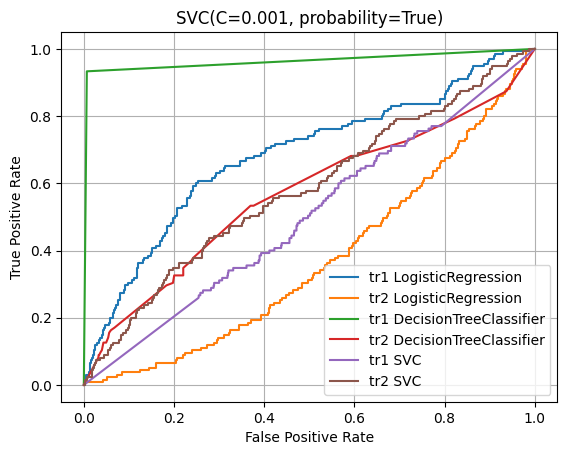

In [197]:
Xy_sets = {'transform1': (X_train_t1, X_test_t1, y_train_t1, y_test_t1), 'transform2': (X_train_t2, X_test_t2, y_train_t2, y_test_t2)}
for i in range(len(res)):
  m0 = res[i]
  if i % 2 == 0:
    X_train_, X_test_, y_train_, y_test_ = Xy_sets['transform1']
    label = 'tr1 ' + type(m0).__name__
  else:
    X_train_, X_test_, y_train_, y_test_ = Xy_sets['transform2']
    label = 'tr2 ' + type(m0).__name__
  m0.fit(X_train_, y_train_)
  y_pred_proba1 = m0.predict_proba(X_test_)[:,1]
  fpr, tpr, _ = roc_curve(y_test_,  y_pred_proba1)
  plt.plot(fpr,tpr, label=label)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(m0)
plt.legend()
plt.grid()

<p class="task" id="9"></p>

9\. Используя любую из обученных моделей, сделайте предсказания столбца `IsHoliday` для тестового множества и сохраните результат в виде csv файла следующего вида:

```
id,isHoliday
1,0
2,1
...
```

In [210]:
model9 = res[2] # tr1 Tree
model9.fit(X_train_t1, y_train_t1)
y_pred9 = model9.predict(X_test_t1)
predictions = pd.DataFrame(np.c_[np.arange(1,y_pred9.shape[0]+1),y_pred9], columns=['id', 'isHoliday'])
predictions.sample(10)

,id,isHoliday
490,491.0,0.0
594,595.0,0.0
970,971.0,0.0
1603,1604.0,0.0
1012,1013.0,1.0
1290,1291.0,0.0
74,75.0,0.0
1771,1772.0,0.0
151,152.0,0.0
706,707.0,0.0


In [211]:
predictions.to_csv('isHoliday_prediction')

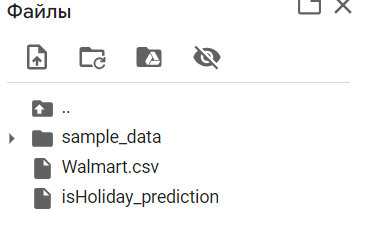

## Обратная связь
- [ ] Хочу получить обратную связь по решению